**1.Mounting Google Drive**

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: now unzip the dataset Dataset.zip in that i have Data sub folder in that I have train,test and valid sub folders in that i have 4 sub folders in those images i have

import os
import zipfile

# Define the path to your zip file in Google Drive
zip_file_path = '/content/drive/My Drive/Dataset.zip'

# Define the directory where you want to extract the contents
extract_path = '/content/extracted_dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")

# You can optionally list the contents of the extracted directory to verify
!ls {extract_path}/Data

Dataset extracted to: /content/extracted_dataset
test  train  valid


**EXPLANATION**

1. **Specify ZIP File and Extraction Path**
   The variable `zip_file_path` stores the location of the ZIP file (`Dataset.zip`) in Google Drive. The variable `extract_path` defines where the contents of the ZIP file will be extracted—in this case, to `/content/extracted_dataset`.

2. **Create Destination Folder (if needed)**
   `os.makedirs(extract_path, exist_ok=True)` checks if the target folder exists, and if not, creates it. This ensures there's a valid location ready to receive the extracted files.

3. **Unzip the Dataset**
   The `zipfile.ZipFile` method opens the ZIP file in read mode (`'r'`). Then `extractall()` unpacks all its contents into the specified directory. Inside `Dataset.zip`, there is a `Data/` folder that contains `train`, `test`, and `valid` folders, each with 4 class-wise subfolders of images.

4. **Verify the Extraction**
   The command `!ls {extract_path}/Data` is a shell command (using `!` in a Jupyter/Colab environment) that lists the contents of the `Data` directory, allowing you to visually confirm that `train`, `test`, and `valid` folders are extracted successfully.


**3.SUBFOLDERS IN TRAIN**

In [ ]:
# Run this in Colab to list actual subfolders in 'train'
import os

train_path = '/content/extracted_dataset/Data/train'
folders = sorted(os.listdir(train_path))
print("Subfolders in train:")
for f in folders:
    print(f)


Subfolders in train:
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
normal
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


**EXPLANATION**
1. The script sets the path to the `train` directory within the extracted dataset.
2. It lists and sorts all subfolder names (i.e., class folders) in the `train` directory.
3. Each subfolder name is printed to display the class categories present in the training data.


**4.SUBFOLDERS IN TEST**

In [ ]:
test_path = '/content/extracted_dataset/Data/test'
test_folders = sorted(os.listdir(test_path))
print("\nSubfolders in test:")
for f in test_folders:
    print(f)


Subfolders in test:
adenocarcinoma
large.cell.carcinoma
normal
squamous.cell.carcinoma


**EXPLANATION**
1. This sets `test_path` to the location of the `test` directory in the extracted dataset.
2. It retrieves and sorts all subfolder names (class folders) in the `test` directory.
3. It prints the names of these subfolders to show the test data categories.


**5.SUBFOLDERS IN VALID**

In [ ]:
valid_path = '/content/extracted_dataset/Data/valid'
valid_folders = sorted(os.listdir(valid_path))
print("\nSubfolders in valid:")
for f in valid_folders:
    print(f)


Subfolders in valid:
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
normal
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


**EXPLANATION**
1. This sets `valid_path` to the location of the `valid` directory in the extracted dataset.
2. It retrieves and sorts the names of all subfolders (representing classes) within the `valid` directory.
3. Each subfolder name is printed to display the class categories in the validation data.


**6.READING SINGLE IMAGE IN EVERY SUBFOLDER**

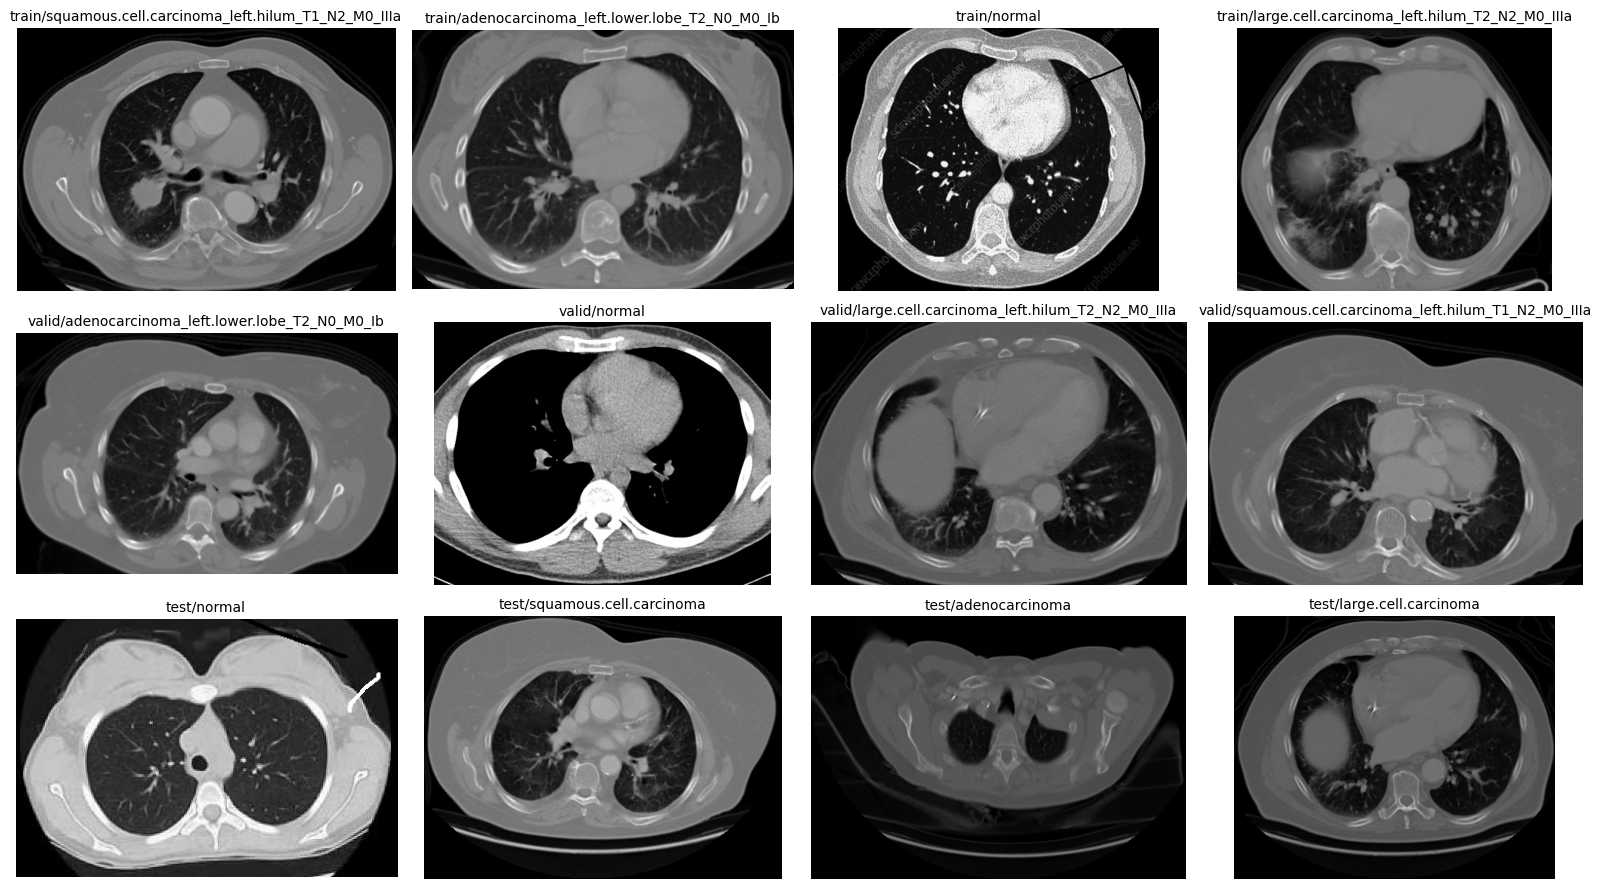

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Base dataset path
base_path = "/content/extracted_dataset/Data"

# Splits and how many folders to pick from each
split_selection = {
    "train": 4,
    "valid": 4,
    "test": 4
}

plt.figure(figsize=(16, 9))
img_index = 1

for split, num_folders in split_selection.items():
    split_path = os.path.join(base_path, split)
    all_folders = sorted([f for f in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, f))])
    selected_folders = random.sample(all_folders, num_folders)

    for folder in selected_folders:
        folder_path = os.path.join(split_path, folder)
        images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not images:
            continue
        img_file = random.choice(images)
        img_path = os.path.join(folder_path, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(3, 4, img_index)
        plt.imshow(img)
        plt.title(f"{split}/{folder}", fontsize=10)
        plt.axis('off')
        img_index += 1

plt.tight_layout()
plt.show()


**EXPLANATION**
1. **Setup and Selection**: It defines the dataset path and selects 4 subfolders randomly from each split (train/valid/test).
2. **Image Loading**: From each selected folder, it randomly picks one image file and reads it using `matplotlib.image.imread`.
3. **Plotting**: The images are displayed in a 3x4 grid with their corresponding split and class name as the title.
4. **Display**: The final grid is shown using `plt.show()` with layout adjustments for neatness.


**7.DATA PRE-PROCESSING**

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Parameters
input_base_path = "/content/extracted_dataset/Data"
output_base_path = "/content/processed_dataset"  # where preprocessed images will be saved
os.makedirs(output_base_path, exist_ok=True)

# Hyperparameters
target_size = (224, 224)
gamma_value = 1.5  # You can tweak this as needed

def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Loop through dataset
for split in ['train', 'valid', 'test']:
    split_input_path = os.path.join(input_base_path, split)
    split_output_path = os.path.join(output_base_path, split)
    os.makedirs(split_output_path, exist_ok=True)

    for class_folder in os.listdir(split_input_path):
        class_input_path = os.path.join(split_input_path, class_folder)
        class_output_path = os.path.join(split_output_path, class_folder)
        os.makedirs(class_output_path, exist_ok=True)

        for image_file in tqdm(os.listdir(class_input_path), desc=f"{split}/{class_folder}"):
            img_path = os.path.join(class_input_path, image_file)
            img = cv2.imread(img_path)

            if img is None:
                continue

            # Resize
            img = cv2.resize(img, target_size)

            # Gamma correction
            img = adjust_gamma(img, gamma=gamma_value)

            # Bilateral filter
            img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

            # Normalize to 0-1
            img = img.astype(np.float32) / 255.0

            # Optional: save as npy (fast) or convert back to uint8 and save as image
            save_path = os.path.join(class_output_path, image_file)
            img_uint8 = (img * 255).astype(np.uint8)
            cv2.imwrite(save_path, img_uint8)


train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 100%|██████████| 155/155 [00:02<00:00, 60.90it/s]
train/normal: 100%|██████████| 148/148 [00:02<00:00, 64.65it/s]
train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 100%|██████████| 115/115 [00:01<00:00, 81.50it/s]
train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 100%|██████████| 195/195 [00:02<00:00, 81.18it/s]
valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 100%|██████████| 15/15 [00:00<00:00, 83.40it/s]
valid/normal: 100%|██████████| 13/13 [00:00<00:00, 53.29it/s]
valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 100%|██████████| 21/21 [00:00<00:00, 85.12it/s]
test/squamous.cell.carcinoma: 100%|██████████| 90/90 [00:01<00:00, 56.95it/s]


**EXPLANATION**
1. **Setup**: It defines input/output paths and parameters like target image size, gamma value, and creates necessary directories.
2. **Gamma Correction Function**: `adjust_gamma()` applies gamma correction using a lookup table for contrast enhancement.
3. **Processing Loop**: For each image in `train`, `valid`, and `test` folders, it resizes, applies gamma correction, bilateral filtering, and normalizes pixel values to \[0, 1].
4. **Save Processed Images**: The preprocessed images are converted back to `uint8` and saved to the corresponding output directory.


**8. AUGMENTATION**

In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Base input/output paths
input_base = "/content/processed_dataset"
output_base = "/content/augmented_dataset"
os.makedirs(output_base, exist_ok=True)

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

def balance_and_augment(split):
    print(f"⏳ Processing {split}...")
    src_split_path = os.path.join(input_base, split)
    tgt_split_path = os.path.join(output_base, split)
    os.makedirs(tgt_split_path, exist_ok=True)

    # Count images per class
    class_counts = {
        cls: len(os.listdir(os.path.join(src_split_path, cls)))
        for cls in os.listdir(src_split_path)
        if os.path.isdir(os.path.join(src_split_path, cls))
    }

    max_count = max(class_counts.values())

    for cls, count in class_counts.items():
        src_cls_path = os.path.join(src_split_path, cls)
        tgt_cls_path = os.path.join(tgt_split_path, cls)
        os.makedirs(tgt_cls_path, exist_ok=True)

        # Copy original images
        for img_name in os.listdir(src_cls_path):
            shutil.copy(os.path.join(src_cls_path, img_name), os.path.join(tgt_cls_path, img_name))

        if count >= max_count:
            continue  # already balanced

        # Begin augmentation
        needed = max_count - count
        images = [f for f in os.listdir(src_cls_path) if f.lower().endswith(('jpg', 'png', 'jpeg'))]
        i = 0
        while i < needed:
            img_name = np.random.choice(images)
            img_path = os.path.join(src_cls_path, img_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            for batch in datagen.flow(x, batch_size=1, save_to_dir=tgt_cls_path, save_prefix='aug', save_format='jpg'):
                i += 1
                if i >= needed:
                    break

    print(f"✅ Done: {split} → {tgt_split_path}")

# Apply to all splits
for split in ['train', 'valid', 'test']:
    balance_and_augment(split)


⏳ Processing train...
✅ Done: train → /content/augmented_dataset/train
⏳ Processing valid...
✅ Done: valid → /content/augmented_dataset/valid
⏳ Processing test...
✅ Done: test → /content/augmented_dataset/test


EXPLANATION

1. **Setup**: Defines paths and a `ImageDataGenerator` for augmentation (rotations, shifts, zoom, flips, brightness, etc.).
2. **Balancing Logic**: For each class in `train`, `valid`, and `test`, it finds the class with the most images (`max_count`).
3. **Augmentation**: It copies original images and generates additional augmented ones to match `max_count` for class balancing.
4. **Output**: Balanced and augmented images are saved in `/content/augmented_dataset/<split>/<class>` folders.


**9.IDENTIFYING IMAGES**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    directory='/content/augmented_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_gen = datagen.flow_from_directory(
    directory='/content/augmented_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 946 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


EXPLANATION

1. **Data Generator Setup**: An `ImageDataGenerator` is created with rescaling to normalize pixel values to \[0, 1].
2. **Training Generator**: `train_gen` loads images from the `train` directory, resizes them to 224×224, and prepares them in batches of 32 for training.
3. **Validation Generator**: `valid_gen` does the same for the `valid` dataset to be used during model validation.




**10.TRAINING MOBILENET**

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 4,100 (16.02 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.2781 - loss: 2.2001 - val_accuracy: 0.4196 - val_loss: 1.3019
Epoch 2/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.2858 - loss: 1.6919 - val_accuracy: 0.5089 - val_loss: 1.2336
Epoch 3/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.3430 - loss: 1.5577 - val_accuracy: 0.5714 - val_loss: 1.1546
Epoch 4/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.4234 - loss: 1.3705 - val_accuracy: 0.5625 - val_loss: 1.0933
Epoch 5/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.4029 - loss: 1.3363 - val_accuracy: 0.5982 - val_loss: 1.0288
Epoch 6/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5140 - loss: 1.2011 - val_accuracy: 0.5982 - val_loss: 0.9967
Epoch 7/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5229 - loss: 1.1461 - val_accuracy: 0.6161 - val_loss: 0.9418
Epoch 8/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5997 - loss: 1.0186 - val_accuracy: 0.6161 - val_loss: 

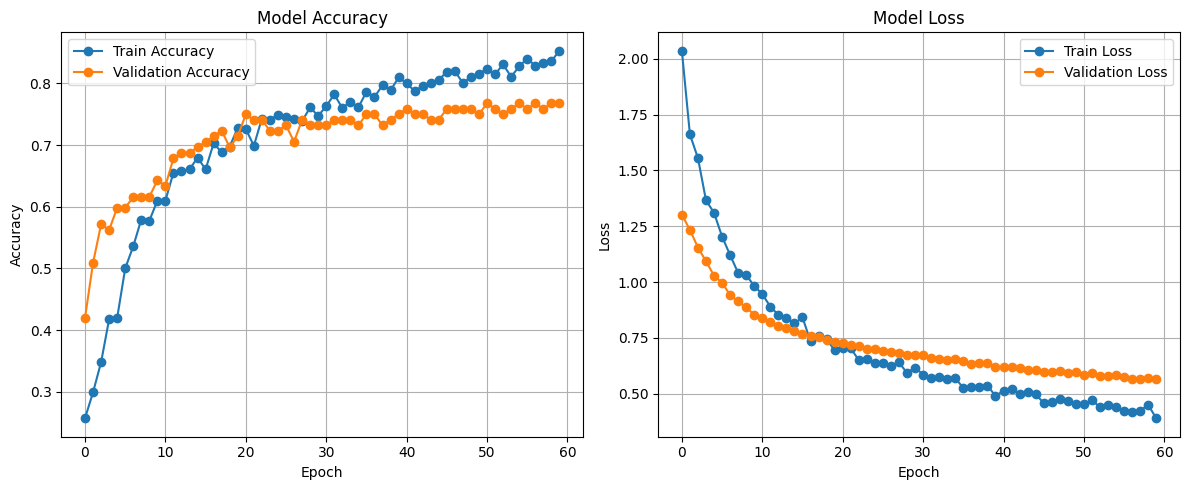

✅ Final Training Accuracy: 85.31%
✅ Final Validation Accuracy: 76.79%


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ====== STEP 1: Build and Compile MobileNet ======
base_model = MobileNet(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

# Get the number of classes from the training data generator
num_classes = len(train_gen.class_indices)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ====== STEP 2: Train Model ======
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=60,
    #callbacks=[early_stop]
)

# ====== STEP 3: Plot Accuracy and Loss ======
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ====== STEP 4: Print Final Accuracies ======
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {final_train_acc:.2%}")
print(f"✅ Final Validation Accuracy: {final_val_acc:.2%}")
# ====== STEP 5: Save the Trained Model ======
model.save('mobilenet_model.h5')  # or 'mobilenet_model.h5'



**EXPLANATION**

1. **Model Construction**: A MobileNet (without top layers) is used as the base. It's frozen and extended with global pooling, dropout, and a final dense layer matching the number of classes.

2. **Compilation and Training**: The model is compiled with `Adam` optimizer and trained for up to 60 epochs using `train_gen` and `valid_gen`, optionally with early stopping.

3. **Visualization**: Accuracy and loss curves for training and validation are plotted to observe the model’s performance across epochs.

4. **Results and Saving**: Final accuracies are printed, and the trained model is saved as `mobilenet_model.h5`.


**11.FINE TUNING MOBILENET**

📌 Phase 1: Training only the top classifier...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.2611 - loss: 1.9647 - val_accuracy: 0.3661 - val_loss: 1.3241
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3025 - loss: 1.5950 - val_accuracy: 0.4018 - val_loss: 1.2040
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3247 - loss: 1.5380 - val_accuracy: 0.4911 - val_loss: 1.1219
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.3888 - loss: 1.3948 - val_accuracy: 0.5982 - val_loss: 1.0505
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.4666 - loss: 1.2565 - val_accuracy: 0.6607 - val_loss: 0.9924
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.4567 - loss: 1.2226 - val_accuracy: 0.7054 - val_loss: 0.9482
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5338 - loss: 1.1007 - val_accuracy: 0.6964 - val_loss: 0.9143
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy:

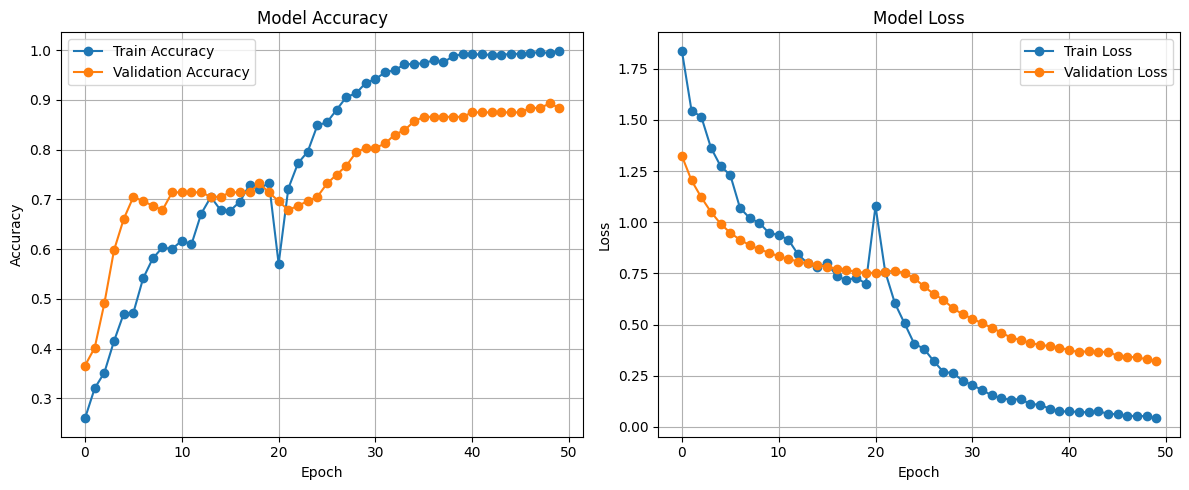

✅ Final Training Accuracy: 99.89%
✅ Final Validation Accuracy: 88.39%


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ====== STEP 1: Build and Train Initial Model (Frozen Base) ======
base_model = MobileNet(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze entire base initially

num_classes = len(train_gen.class_indices)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

print("📌 Phase 1: Training only the top classifier...")
history1 = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=20,
    callbacks=[early_stop]
)

# ====== STEP 2: Fine-tune Top Layers of MobileNet ======
print("🔓 Phase 2: Unfreezing some top layers of MobileNet...")
for layer in base_model.layers[-30:]:  # Fine-tune last 30 layers
    layer.trainable = True

# Recompile with smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop_finetune = EarlyStopping(patience=5, restore_best_weights=True)

history2 = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30,
    callbacks=[early_stop_finetune]
)

# ====== STEP 3: Combine History ======
history = {}
for key in history1.history:
    history[key] = history1.history[key] + history2.history[key]

# ====== STEP 4: Plot Accuracy and Loss ======
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ====== STEP 5: Final Accuracy ======
final_train_acc = history['accuracy'][-1]
final_val_acc = history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {final_train_acc:.2%}")
print(f"✅ Final Validation Accuracy: {final_val_acc:.2%}")
# ====== STEP 5: Save the Trained Model ======
model.save('mobilenet_model.h5')



**EXPLANATION**

🔹 Phase 1: Train Top Layers Only
Loads MobileNet with imagenet weights and freezes all convolutional layers.

Adds new classification head (GAP → Dropout → Dense with softmax).

Compiles and trains only the new head (trainable=False), using early stopping.

🔹 Phase 2: Fine-tune Top MobileNet Layers
Unfreezes the top 30 layers of the base MobileNet model for fine-tuning.

Recompiles with a lower learning rate (1e-5) to avoid large weight changes.

Trains again with early stopping to improve accuracy using pre-trained knowledge.

🔹 Results & Saving
Combines histories from both training phases and plots accuracy & loss.

Prints final training and validation accuracy.

Saves the trained model as mobilenet_model.h5.

**12.PLOTTING ACCURACY AND LOSS**

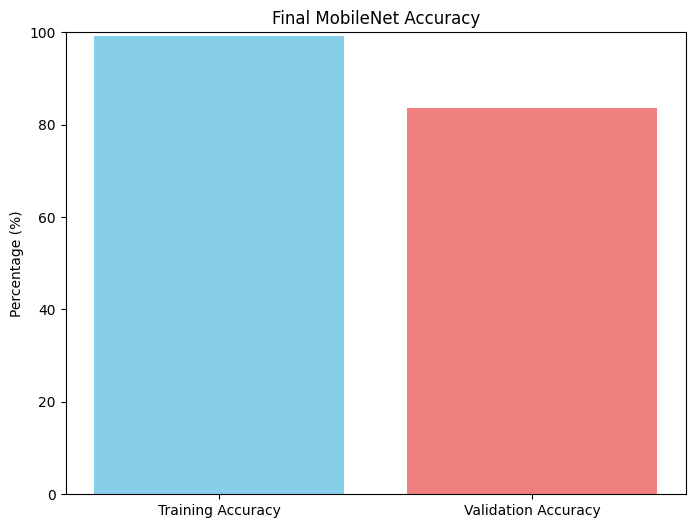

In [ ]:
# prompt: plot graph for accuracies and loss for mobilenet using above data As a bar chart

# Provided accuracies
accuracies = [99.23, 83.70]
labels = ['Training Accuracy', 'Validation Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0, 100) # Set y-axis limit from 0 to 100 for percentages
plt.ylabel('Percentage (%)')
plt.title('Final MobileNet Accuracy')
plt.show()

**13. IMPORTING OTHER MODELS**

In [ ]:
from tensorflow.keras.applications import ResNet50, EfficientNetB3, DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


**14.TRAIN RESNET50**

**15.TRAIN EFFICIENETB3**


📌 Training EfficientNetB3...
Found 946 images belonging to 4 classes.
Found 112 images belonging to 4 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.2187 - loss: 1.4114

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.2194 - loss: 1.4110 - val_accuracy: 0.2232 - val_loss: 1.3843
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.2724 - loss: 1.3850 - val_accuracy: 0.2232 - val_loss: 1.3780
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.2965 - loss: 1.3753 - val_accuracy: 0.2232 - val_loss: 1.3733
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.2888 - loss: 1.3654 - val_accuracy: 0.2411 - val_loss: 1.3692
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.3120 - loss: 1.3730 - val_accuracy: 0.2679 - val_loss: 1.3616
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.3135 - loss: 1.3688 - val_accuracy: 0.2679 - val_loss: 1.3585
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.3273 - loss: 1.3707 - val_accuracy: 0.3214 - val_loss: 1.3540
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.3587 - loss: 1.3450 - val_accuracy: 0.3125 - val_loss: 1

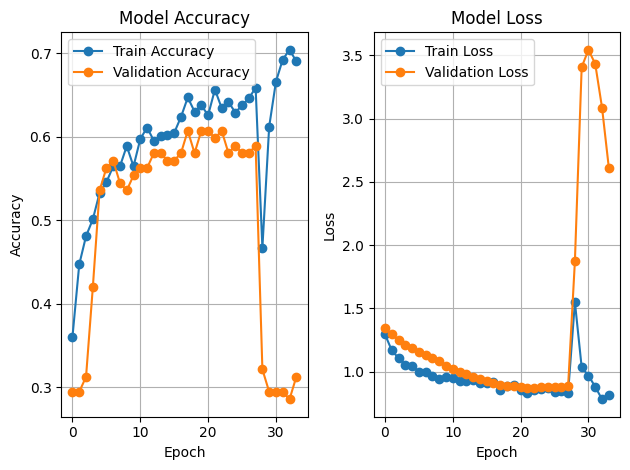

✅ Final Training Accuracy: 45.14%
✅ Final Validation Accuracy: 51.79%
✅ EfficientNetB3 model saved as efficientnetb3_model.keras


In [ ]:
# ===== EfficientNetB3 =====
print("\n📌 Training EfficientNetB3...")

from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

# Re-create data generators with correct paths
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/augmented_dataset/train', # Corrected path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

valid_gen = valid_datagen.flow_from_directory(
    '/content/augmented_dataset/valid', # Corrected path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


base_model = EfficientNetB3(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(len(train_gen.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_gen, validation_data=valid_gen, epochs=20, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Fine-tune
print("🔓 Fine-tuning EfficientNetB3...")
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(train_gen, validation_data=valid_gen, epochs=30, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Combine history and save
history = {k: history1.history[k] + history2.history[k] for k in history1.history}

# ====== STEP 5: Final Accuracy ======
final_train_acc = history['accuracy'][-1]
final_val_acc = history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {final_train_acc:.2%}")
print(f"✅ Final Validation Accuracy: {final_val_acc:.2%}")

model.save('efficientnetb3_model.keras') # Changed to .keras format
print("✅ EfficientNetB3 model saved as efficientnetb3_model.keras")

EXPLANATION
1. **Model Setup**: Loads EfficientNetB3 with pretrained ImageNet weights, freezes it, and adds custom layers for classification.
2. **Training**: First trains only the top layers, then fine-tunes the last 30 layers of the base model with a lower learning rate.
3. **Visualization**: Plots training and validation accuracy/loss across all epochs.
4. **Result & Saving**: Prints final accuracies and saves the trained model as `efficientnetb3_model.keras`.


**16.TRAINING DENSENET201**


📌 Training DenseNet201...
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.2525 - loss: 1.8355 - val_accuracy: 0.3152 - val_loss: 1.3415
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.3696 - loss: 1.4432 - val_accuracy: 0.3804 - val_loss: 1.2748
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.3620 - loss: 1.3889 - val_accuracy: 0.4457 - val_loss: 1.2301
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.4192 - loss: 1.2997 - val_accuracy: 0.4348 - val_loss: 1.1918
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.4324 - loss: 1.2436 - val_accuracy: 0.4457 - val_loss: 1.1593
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.4928 - loss: 1.1738 - val_accuracy: 0.4783 - val_loss: 1.1328
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.4922 - loss: 1.1958 - val_accuracy: 0.5000 - val_loss: 1.1055
Epoch 8/20
25/25 ━━━━━━━━━━

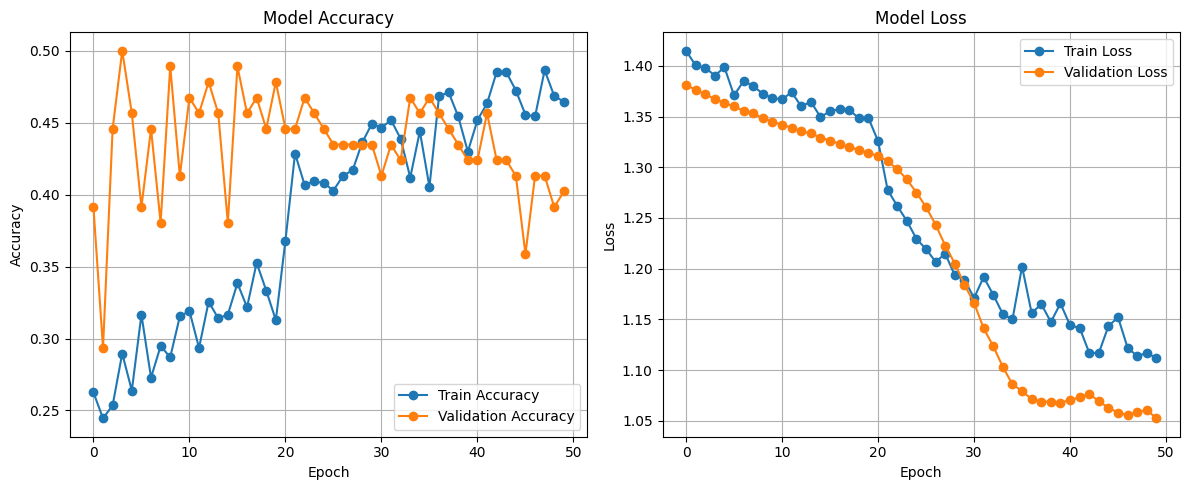

✅ Final Training Accuracy: 46.46%
✅ Final Validation Accuracy: 40.22%


In [ ]:
# ===== DenseNet201 =====
print("\n📌 Training DenseNet201...")

base_model = DenseNet201(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(len(train_gen.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_gen, validation_data=valid_gen, epochs=20, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Fine-tune
print("🔓 Fine-tuning DenseNet201...")
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(train_gen, validation_data=valid_gen, epochs=30, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ====== STEP 5: Final Accuracy ======
final_train_acc = history['accuracy'][-1]
final_val_acc = history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {final_train_acc:.2%}")
print(f"✅ Final Validation Accuracy: {final_val_acc:.2%}")



# Combine history and save
history = {k: history1.history[k] + history2.history[k] for k in history1.history}
model.save('densenet201_model.h5')



EXPLANATION

1. **Model Setup**: Initializes DenseNet201 with `imagenet` weights, freezes it, and adds custom layers for classification.
2. **Two-Phase Training**: First trains the classifier head, then fine-tunes the last 30 layers of DenseNet201 with a lower learning rate.
3. **Plotting & Accuracy**: Accuracy and loss graphs are plotted, and final training/validation accuracies are printed.
4. **Save Model**: Combines histories from both phases and saves the trained model as `densenet201_model.h5`.
